# Gaussian Processes

In [2]:
%load_ext autoreload # for dev.
%autoreload 2 

from kernels import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

___

In [155]:
# dataset
N, D = 9, 1
x = np.linspace(1,10, N) + 0.1*(2*np.random.random(N)-1)
x = x[:,None]
y = np.cos(x) + (2*np.random.random((N, 1))-1)
data = np.concatenate((x,y), axis=1)

### Augmentation test

In [156]:
kernel = GaussianKernel(data, sigma=0.8, beta=1)
print('Kernel shape:', kernel.K.shape)

kernel.augment(data+0.1)
print('Augmented Kernel shape:', kernel.K.shape)

Kernel shape: (9, 9)
Augmented Kernel shape: (18, 18)


### Fitting test (high precision)

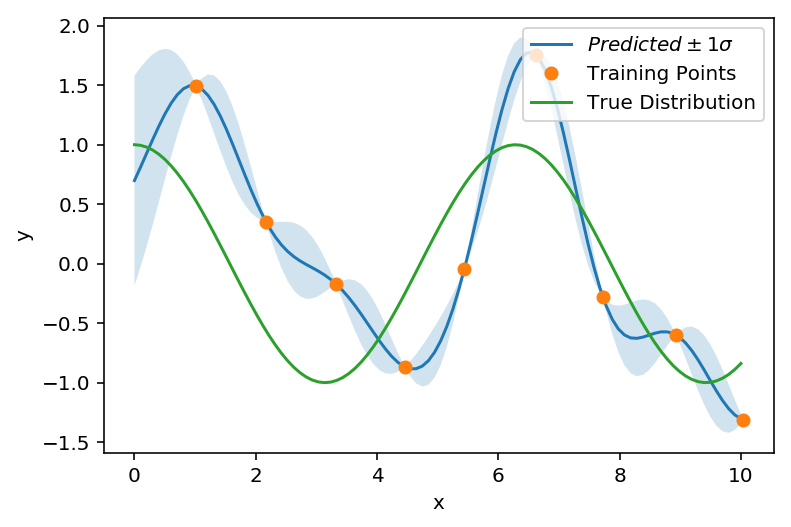

In [157]:
kernel = GaussianKernel(data, sigma=0.8, beta=10000)
n_test = 100
z = np.linspace(0,10,n_test)
z = z[:,None]

yp, ys = kernel.predict(z)
ys = np.diag(ys)
ys = 1*np.sqrt(ys) # 68% CI

z = z[:,0]
plt.figure()
plt.plot(z, yp, label=r'$Predicted \pm 1\sigma$')
plt.plot(x, y, 'o', label='Training Points')
plt.plot(z, np.cos(z), label='True Distribution')
plt.fill_between(z, yp+ys, yp-ys, alpha=.2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0);

### Online learning test

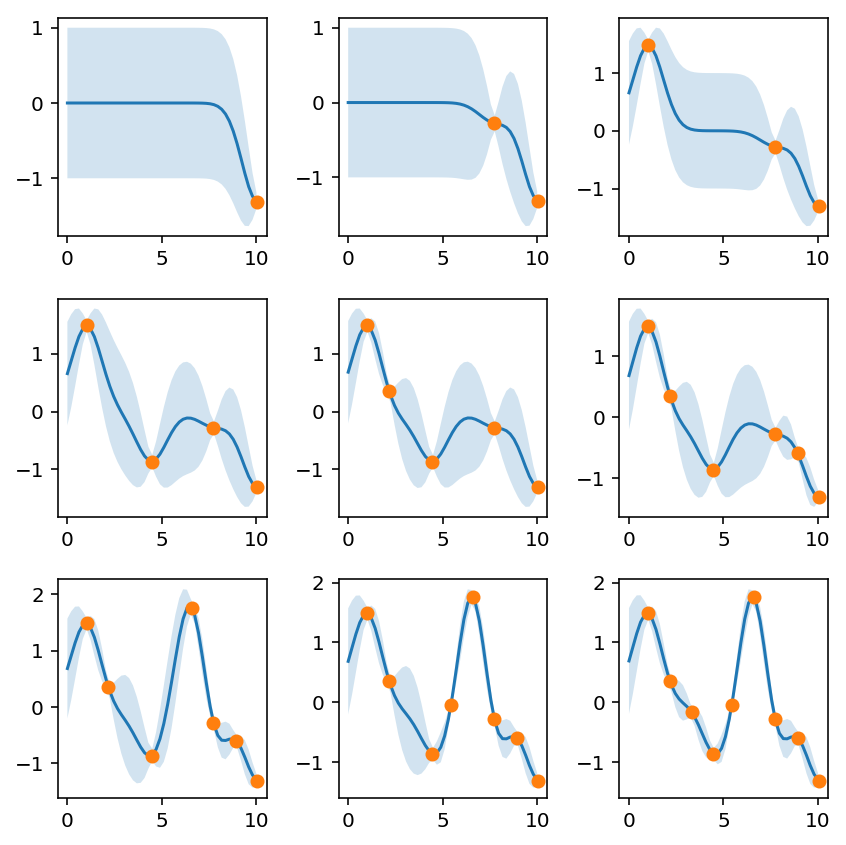

In [158]:
D = np.c_[x,y]
np.random.shuffle(D)

n_test = 50

z = np.linspace(0,10,n_test)
z = z[:,None]

kernel = GaussianKernel(D[:1,], sigma=0.8, beta=100)

plt.figure(figsize=(6,6))
nr, nc, cn = D.shape[0]//3, 3, 1
plt.subplot(nr,nc,cn)
yp, ys = kernel.predict(z)
ys = np.diag(ys)
ys = 1*np.sqrt(ys) # 68% CI
plt.plot(z[:,0], yp)
plt.plot(D[0,0], D[0,1], 'o')
plt.fill_between(z[:,0], yp+ys, yp-ys, alpha=.2)

for cn, point in enumerate(D[1:]):
    kernel.augment(np.array([point]))
    plt.subplot(nr,nc,cn+2)
    yp, ys = kernel.predict(z)
    ys = np.diag(ys)
    ys = 1*np.sqrt(ys)
    plt.plot(z[:,0], yp)
    plt.plot(D[:cn+2,0], D[:cn+2,1], 'o')
    plt.fill_between(z[:,0], yp+ys, yp-ys, alpha=.2)
plt.tight_layout();

### Sample drawing test

[[2.         1.99206056 1.96861845 ... 1.         1.         1.        ]
 [1.99206056 2.         1.99206056 ... 1.         1.         1.        ]
 [1.96861845 1.99206056 2.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 2.         1.99206056 1.96861845]
 [1.         1.         1.         ... 1.99206056 2.         1.99206056]
 [1.         1.         1.         ... 1.96861845 1.99206056 2.        ]]
[[0.83747371 0.79881282 0.7405894  0.66462382]
 [0.83599724 0.80789933 0.75929431 0.69142413]
 [0.79949942 0.78109892 0.74229474 0.68376488]
 [0.74414612 0.73420556 0.70482266 0.65615589]]


ValueError: the input matrix must be positive semidefinite

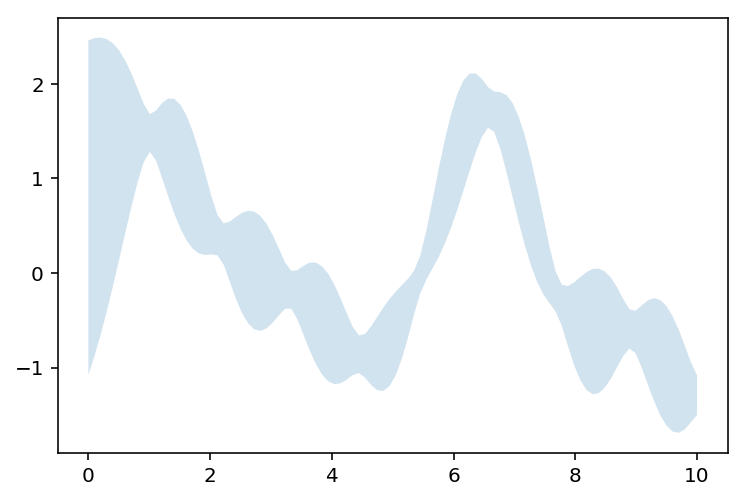

In [159]:
n_test = 100
z = np.linspace(0,10,n_test)
z = z[:,None]

kernel = GaussianKernel(data, sigma=0.8, beta=100)
yp, ys = kernel.predict(z)
ys = np.diag(ys)
ys = 2*np.sqrt(ys)

plt.fill_between(z[:,0], yp+ys, yp-ys, alpha=.2)

n_samples = 4
samples = kernel.draw_samples(z, n_samples)

for sample in samples: plt.plot(z[:,0], sample, 'k-', alpha=0.5)

plt.plot(x, y, 'o', color='orange');